<a href="https://colab.research.google.com/github/nikikiT/crypto/blob/main/elliptic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

In [ ]:
import numpy as np

A = -3
B = 5

def y_value(a, b, x):
    #Get positive y value of the curve given x
    return pow(pow(x, 3) + x * a + b, 0.5)

class Point:
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y

    def __repr__(self):
        return "Point({}, {})".format(self.x, self.y)

    def __add__(self, other):
        assert type(other) is Point
        if self.x == other.x and self.y == other.y:
            return self.double()
        dx = other.x - self.x
        dy = other.y - self.y
        if dx == 0:
            return Point()
        slope = dy / dx
        x = (slope ** 2) - self.x - other.x
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)

    def double(self):
        slope = (3 * (self.x ** 2) + A) / (2 * self.y)
        x = (slope ** 2) - (2 * self.x)
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)

    def oppsite(self):
        return Point(self.x, -self.y)

    def np(self):
        return np.array([self.x, self.y])




In [ ]:
import matplotlib.pyplot as plt

def plot_ec():
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    z = pow(y, 2) - pow(x, 3) - x * A - B

    plt.contour(x.ravel(), y.ravel(), z, [0])
    plt.axhline(y=0, color='r')
    plt.axvline(x=0, color='b')


def plot_distinct_point_curve(p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    plot_ec()

    p2 = p0 + p1

    line0 = np.array([
        p0.np(),
        p2.oppsite().np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[2], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(third_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()


def plot_double_point_curve(p, p_annotation, sum_point_annotation):
    plot_ec()

    p2 = p.double()

    line0 = np.array([
        p.np(),
        p2.oppsite().np(),
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()


def plot_n_point_curve(p, n, p_annotation, sum_point_annotation):
    plot_ec()

    current_p = p
    for _ in range(n):
        current_p += p

    line0 = np.array([
        p.np(),
        current_p.np(),
    ])
    plt.plot(line0[:,0], line0[:,1], linestyle='--', marker='o')
    plt.annotate(p_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(sum_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    plt.grid()
    plt.show()

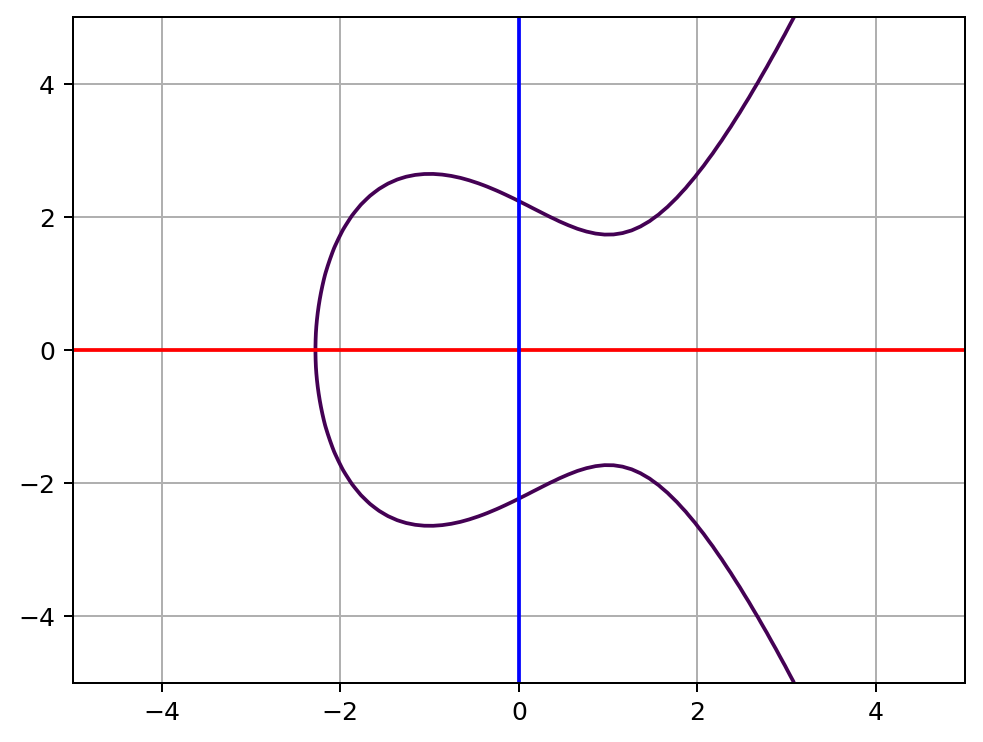

In [ ]:
plot_ec()
plt.grid()
plt.show()